In [1]:
import pandas as pd
import numpy as np
import os
import math

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
root_dir = "/nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/WH04/4A_outputs/"

experiments = {
    "B3" : "Control",
    "B4" : "MyoD",
    "B6" : "PRRX1/MyoD",
}

df_list = []

for _dir, condition in experiments.items():
    file_path  =f"{root_dir}{_dir}/Cell Count Summary Blue.csv"
    tmp = pd.read_csv(file_path)
    
    tmp['Scene'] = _dir
    tmp['Condition'] = condition
    tmp['Frame'] = tmp.index + 1
    tmp['Delta'] = tmp['Count'].diff()
    
    monotonic_growth = []
    
    count = 0
    for c in tmp['Count']:
        if c > count:
            count = c
        monotonic_growth.append(count)
        
    tmp['Monotonic Growth'] = monotonic_growth
    
    df_list.append(tmp)
    
df = pd.concat(df_list, ignore_index=True)
df.head()

,Slice,Count,Total Area,Average Size,%Area,Mean,Major,Minor,Angle,Scene,Condition,Frame,Delta,Monotonic Growth
0,c:4/5 t:1/19 - 2020-05-22-Scene1-B3-cropped-st...,2612,867425.358,332.092,7.510,255,23.985,17.233,83.083,B3,Control,1,NaN,2612
1,c:4/5 t:2/19 - 2020-05-22-Scene1-B3-cropped-st...,2578,846727.094,328.443,7.330,255,23.688,17.251,85.795,B3,Control,2,-34.0,2612
2,c:4/5 t:3/19 - 2020-05-22-Scene1-B3-cropped-st...,2580,818271.009,317.159,7.084,255,23.283,16.950,83.748,B3,Control,3,2.0,2612
3,c:4/5 t:4/19 - 2020-05-22-Scene1-B3-cropped-st...,2577,797088.435,309.309,6.901,255,23.084,16.661,84.407,B3,Control,4,-3.0,2612
4,c:4/5 t:5/19 - 2020-05-22-Scene1-B3-cropped-st...,2598,785762.045,302.449,6.803,255,22.991,16.343,83.579,B3,Control,5,21.0,2612


In [3]:
# normalize the growth by the initial value
df['init_count'] = df.groupby('Condition')['Count'].transform('first')
df['Normalized Count'] =  (df['Count'] / df['init_count']) - 1

# normalize monotonic_growth by the initial value
df['init_count_mono'] = df.groupby('Condition')['Monotonic Growth'].transform(np.min)
df['Normalized Monotonic Count'] =  (df['Monotonic Growth'] / df['init_count_mono']) - 1

# normalize the Delta by the average
df['mean_delta'] = df.groupby('Condition')['Delta'].transform(np.mean)
df['Normalized Delta'] =  df['Delta'] / df['mean_delta']

# add "time" column
df['Time'] = (df['Frame'] * 25) / 60

df.head()

,Slice,Count,Total Area,Average Size,%Area,Mean,Major,Minor,Angle,Scene,...,Frame,Delta,Monotonic Growth,init_count,Normalized Count,init_count_mono,Normalized Monotonic Count,mean_delta,Normalized Delta,Time
0,c:4/5 t:1/19 - 2020-05-22-Scene1-B3-cropped-st...,2612,867425.358,332.092,7.510,255,23.985,17.233,83.083,B3,...,1,NaN,2612,2612,0.000000,2612,0.0,-22.277778,NaN,0.416667
1,c:4/5 t:2/19 - 2020-05-22-Scene1-B3-cropped-st...,2578,846727.094,328.443,7.330,255,23.688,17.251,85.795,B3,...,2,-34.0,2612,2612,-0.013017,2612,0.0,-22.277778,1.526185,0.833333
2,c:4/5 t:3/19 - 2020-05-22-Scene1-B3-cropped-st...,2580,818271.009,317.159,7.084,255,23.283,16.950,83.748,B3,...,3,2.0,2612,2612,-0.012251,2612,0.0,-22.277778,-0.089776,1.250000
3,c:4/5 t:4/19 - 2020-05-22-Scene1-B3-cropped-st...,2577,797088.435,309.309,6.901,255,23.084,16.661,84.407,B3,...,4,-3.0,2612,2612,-0.013400,2612,0.0,-22.277778,0.134663,1.666667
4,c:4/5 t:5/19 - 2020-05-22-Scene1-B3-cropped-st...,2598,785762.045,302.449,6.803,255,22.991,16.343,83.579,B3,...,5,21.0,2612,2612,-0.005360,2612,0.0,-22.277778,-0.942643,2.083333


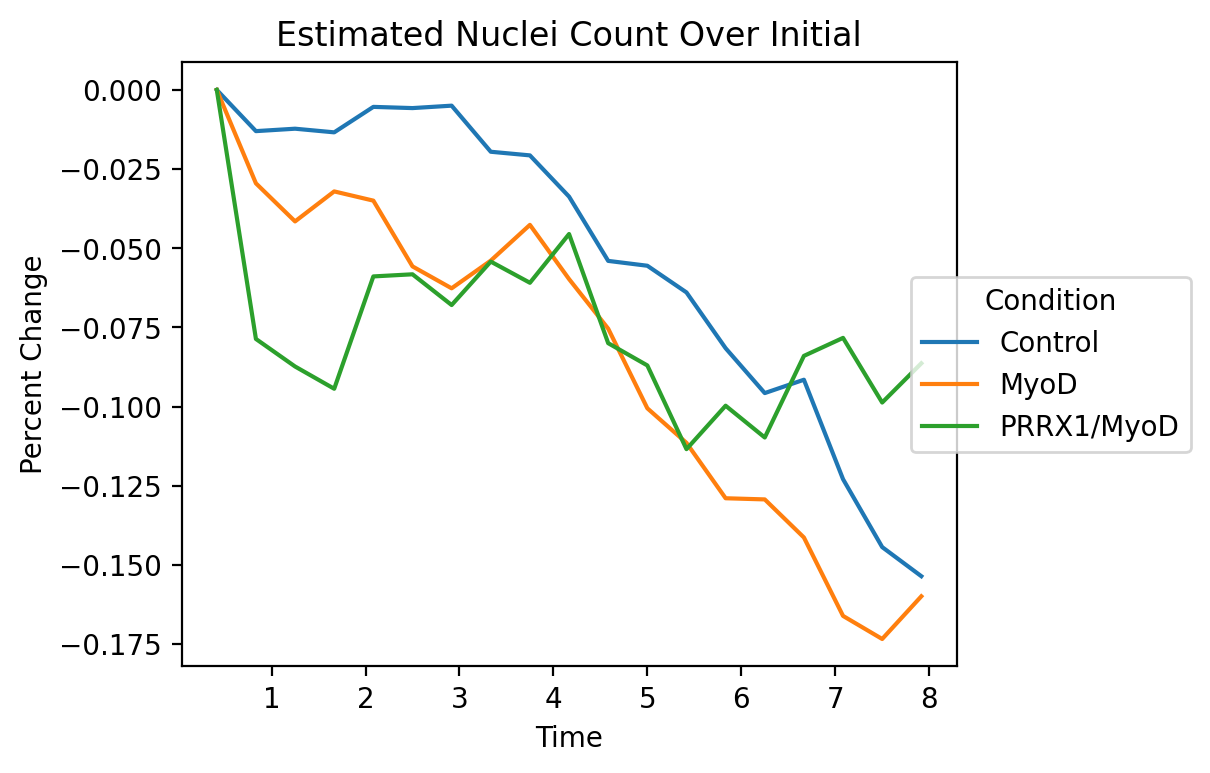

In [4]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 5, 4

sns.lineplot(data=df,
             x='Time',
             y='Normalized Count',
             hue='Condition')

plt.title("Estimated Nuclei Count Over Initial")
plt.ylabel("Percent Change")
plt.legend(title='Condition', bbox_to_anchor=(1.32, 0.5), loc=7)